<a href="https://colab.research.google.com/github/josematez/DeepLearning_SkinCancer/blob/main/Testing_Data_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.15.4
!pip install deepdish
#!pip install tensorflow==1.15
#!pip install keras

     |████████████████████████████████| 13.9MB 233kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.1 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import deepdish as dd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
np.__version__

'1.15.4'

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Data')

Mounted at /content/drive


In [5]:
data = dd.io.load('ISIC_dataset.h5')
data_df = pd.DataFrame(data)

In [6]:
X_raw = data_df.image
Y = data_df.cell_type_idx

In [7]:
X = np.zeros((10015, 75, 100, 3))

for i in range(10015):
  X[i,:,:,:] = X_raw[i]

In [8]:
print("Tamaño datos X: {}".format(X.shape))
print("Tamaño datos Y: {}".format(Y.shape))

Tamaño datos X: (10015, 75, 100, 3)
Tamaño datos Y: (10015,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [10]:
X_train = (X_train / np.max(X_train))
X_test = (X_test / np.max(X_test))

In [11]:
Y_train = to_categorical(Y_train, num_classes = 7)
Y_test = to_categorical(Y_test, num_classes = 7)

In [90]:
input_shape = (75, 100, 3)
num_classes = 7

#InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False)

model = InceptionV3()
model.summary()

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- we have NUM_CLASSES classes
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_757 (Conv2D)             (None, 149, 149, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 149, 149, 32) 96          conv2d_757[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 149, 149, 32) 0           batch_normalization_658[0][0]    
_______________________________________________________________________________________

"\n# VGG16\nmodel = Sequential()\nmodel.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu')),\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same')),\nmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))),\nmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same')),\nmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same')),\nmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))),\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same')),\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same')),\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same')),\nmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))),\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same')),\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same')),\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same')),\nmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))),\nmodel.add(Conv2D(512, (

In [91]:
epocas = 15
bs = 32
lr = 0.0001
optim = Adam(learning_rate = lr)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
callbacks = [reduce_lr]

In [92]:
historico = model.fit(X_train, Y_train, epochs = epocas, batch_size = bs, validation_split = 0.2, callbacks = callbacks)

Epoch 1/15
176/176 [==============================] - 12s 68ms/step - loss: 0.9564 - accuracy: 0.6879 - val_loss: 1.2392 - val_accuracy: 0.6733
Epoch 2/15
176/176 [==============================] - 10s 57ms/step - loss: 0.7156 - accuracy: 0.7491 - val_loss: 0.7847 - val_accuracy: 0.7411
Epoch 3/15
176/176 [==============================] - 10s 56ms/step - loss: 0.5628 - accuracy: 0.8005 - val_loss: 0.7152 - val_accuracy: 0.7511
Epoch 4/15
176/176 [==============================] - 10s 56ms/step - loss: 0.4404 - accuracy: 0.8420 - val_loss: 0.7614 - val_accuracy: 0.7561
Epoch 5/15
176/176 [==============================] - 10s 56ms/step - loss: 0.3135 - accuracy: 0.8925 - val_loss: 0.8347 - val_accuracy: 0.7582
Epoch 6/15
176/176 [==============================] - 10s 56ms/step - loss: 0.2454 - accuracy: 0.9148 - val_loss: 0.8323 - val_accuracy: 0.7689
Epoch 7/15
176/176 [==============================] - 10s 56ms/step - loss: 0.1346 - accuracy: 0.9552 - val_loss: 0.8241 - val_accuracy:

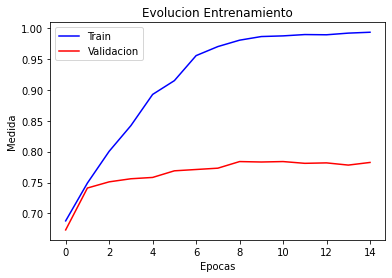

In [93]:
plt.plot(historico.history['accuracy'], c = 'b')
plt.plot(historico.history['val_accuracy'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

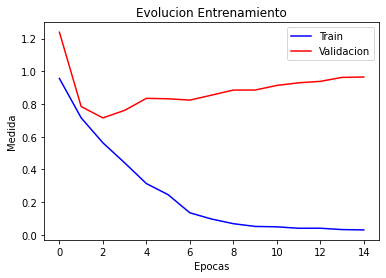

In [94]:
plt.plot(historico.history['loss'], c = 'b')
plt.plot(historico.history['val_loss'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

In [95]:
metricas = model.evaluate(X_test, Y_test)

94/94 [==============================] - 2s 22ms/step - loss: 0.9412 - accuracy: 0.7820
